In [6]:
import numpy as np
import pyaudio
import time
import librosa
import matplotlib.pyplot as plt
import librosa.display
from tensorflow.keras.models import load_model
import keyboard
import cv2
import io
import wave

import os
import matplotlib
matplotlib.use('Agg') # No pictures displayed 
import pylab
import librosa
import librosa.display
import numpy as np

In [3]:
def get_img_from_fig(fig, dpi=400):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=dpi)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img

In [11]:
def preprocessing_spectrogram(img_arr): 
    
    f = cv2.resize(img_arr, (150, 150))
    res = f.reshape(-1, 150, 150, 3)
    
    return res

In [5]:
def create_spectrogram(y, sample_rate):
    
    plt.interactive(False)
        
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max))

    arr = get_img_from_fig(fig)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
  
    return arr

In [7]:
def do_spec (record, save_path):
    sig = record
    fs = 44100
    #sig, fs = librosa.load(filename, sr=None)

    pylab.axis('off') # no axis
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
    S = librosa.feature.melspectrogram(y=sig, sr=fs)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
    pylab.close()

* recording


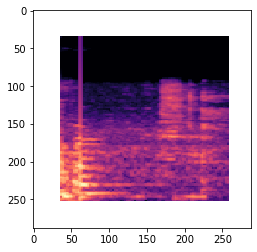

shape (288, 288, 3)
[[0. 1.]]


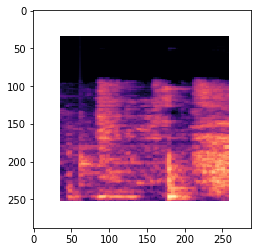

shape (288, 288, 3)
[[0. 1.]]


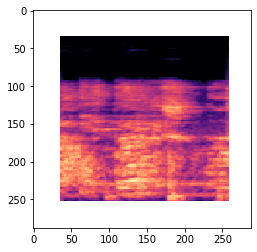

shape (288, 288, 3)
[[0. 1.]]


KeyboardInterrupt: 

In [6]:
CHUNK = 1024
FORMAT = pyaudio.paFloat32
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 1

#WAVE_OUTPUT_FILENAME = "output.wav"

p = pyaudio.PyAudio()
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK,
                input_device_index = 1) # change this parameter to good work

print("* recording")

frames = []

model = load_model(r'D:\save_1.h5')
#model = load_model('/home/aigaf/Downloads/Telegram Desktop/save_1.h5')

while(True):  
    frames = []  
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.extend(data)
    
    #print("* done recording")

    frames = bytes(frames)

    numpy_array = np.frombuffer(frames, dtype=np.float32)
    
    #sp = create_spectrogram(numpy_array, RATE)     
     
    #librosa.display.specshow(librosa.power_to_db(sp, ref=np.max))
    
    
    img_array = create_spectrogram(numpy_array,RATE) 
    
    #spectrogram to console
    plt.imshow(img_array, interpolation='nearest') 
    plt.show()
    #check length and width
    print('shape', img_array.shape)
    
    img_compl = preprocessing_spectrogram(img_array)
    final_result = model.predict(img_compl)
    print(final_result)
    
    #try:  # used try so that if user pressed other than the given key error will not be shown
        #if keyboard.is_pressed('q'):  # if key 'q' is pressed 
            #print('Exit')
            #break  # finishing the loop
    #except:
        #break  # if user pressed a key other than the given key the loop will break
    #print(sp)

# numpy_array = np.frombuffer(pull, dtype=np.float32)
# sp = create_spectrogram(numpy_array, RATE)
# print(sp)

stream.stop_stream()
stream.close()
p.terminate()

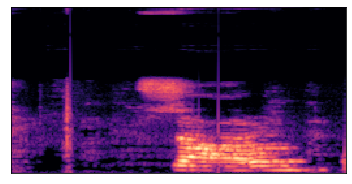

In [7]:
from matplotlib import pyplot as plt 
plt.imshow(sp, interpolation='nearest') 
plt.show() 
librosa.display.specshow(librosa.power_to_db(sp, ref=np.max))

In [6]:
#1
#img - numpy array spectrogram

from sys import argv
import cv2 as cv
import numpy as np

img = sp

ret, threshold = cv.threshold(img, 120, 255, cv.THRESH_BINARY)

cv.imshow('threshold', threshold)
cv.imshow('orig', img)

#2

normalizedImg = np.zeros((150, 150))
normalizedImg = cv.normalize(img,  normalizedImg, 0, 255, cv.NORM_MINMAX)
cv.imshow('dst_rt', normalizedImg)

cv.waitKey(0)
cv.destroyAllWindows()

NameError: name 'sp' is not defined

In [8]:
# get information about audio devices
p = pyaudio.PyAudio()
info = p.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')
for i in range(0, numdevices):
        if (p.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
            print("Input Device id ", i, " - ", p.get_device_info_by_host_api_device_index(0, i))

Input Device id  0  -  {'index': 0, 'structVersion': 2, 'name': 'Microsoft Sound Mapper - Input', 'hostApi': 0, 'maxInputChannels': 2, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
Input Device id  1  -  {'index': 1, 'structVersion': 2, 'name': 'Микрофон (Realtek High Definiti', 'hostApi': 0, 'maxInputChannels': 2, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
Input Device id  2  -  {'index': 2, 'structVersion': 2, 'name': 'Микрофон (NVIDIA RTX Voice)', 'hostApi': 0, 'maxInputChannels': 2, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}


In [18]:
import sounddevice as sd
from scipy.io.wavfile import write
from PIL import Image

fs = 44100  # Sample rate
seconds = 3  # Duration of recording

record = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
print(record.shape, "rec")
sd.wait()  # Wait until recording is finished
write('output.wav', fs, record)  # Save as WAV file


a = []
for i in record:
    for t in i:
        a.append(t)
record = np.asarray(a)
print(type(record))
print(record.shape)


img_array = do_spec(record, 'outspec.jpg') 


img = Image.open(r'D:\reposetory\Save_Transport\main_classifier\outspec.jpg')

img_compl = preprocessing_spectrogram(np.asarray(img))
model = load_model(r'D:\save_1.h5')

final_result = model.predict(img_compl) # [1., 0.] cut sound

if (final_result[0][0] == 1):
    print("Разрез бумаги")
else:
    print("Посторонний шум")
    #spectrogram to console
#plt.imshow(img_array, interpolation='nearest') 
#plt.show()
    #check length and width
    
#img_compl = preprocessing_spectrogram(img_array)
#final_result = model.predict(img_compl)
#print(final_result)

(132300, 1) rec
<class 'numpy.ndarray'>
(132300,)
Разрез бумаги


In [14]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

<ipython-input-14-e18836ca4ace>:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


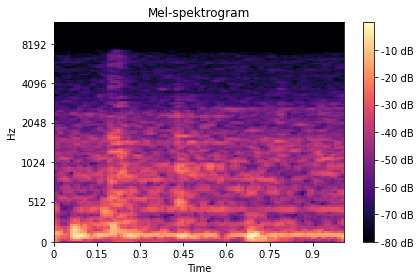

In [14]:
librosa.feature.melspectrogram(y=record, sr=fs)

S = librosa.feature.melspectrogram(y=record, sr=fs, n_mels=128, fmax=12000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=fs, fmax=12000)

plt.colorbar(format='%+2.0f dB')
plt.title('Mel-spektrogram')
plt.tight_layout()
plt.show()


In [10]:
import os
import matplotlib
matplotlib.use('Agg') # No pictures displayed 
import pylab
import librosa
import librosa.display
import numpy as np

sig = record 
# make pictures name 
save_path = 'test.jpg'

pylab.axis('off') # no axis
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
S = librosa.feature.melspectrogram(y=sig, sr=fs)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
pylab.close()

In [20]:
import os
import matplotlib
matplotlib.use('Agg') # No pictures displayed 
import pylab
import librosa
import librosa.display
import numpy as np

sig = record
# make pictures name 
save_path = 'test1.jpg'

pylab.axis('off') # no axis
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
S = librosa.feature.melspectrogram(y=sig, sr=fs)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
#arr = get_img_from_fig(sig)
pylab.close()

In [17]:
import imageio
import numpy
img = imageio.imread(r'D:\reposetory\Save_Transport\main_classifier\test1.jpg')
array = numpy.asarray(img)
print(array.shape)

(288, 432, 3)


In [ ]:
audio_array, sr = librosa.core.load(, sr=sample_rate, mono=True)
melspectrogram = librosa.feature.melspectrogram(y=audio_array, sr=sample_rate, S=None, n_fft=window_size, hop_length=hop_length)